In [1]:
using CSV
using DataFramesMeta
using CategoricalArrays
using Gadfly
using Statistics
using Distributions
using SpecialFunctions
using StatsFuns
using Optim
using ForwardDiff
using Cairo
using Fontconfig
using Distributed
using Loess
@everywhere using DataFrames
@everywhere using SharedArrays
@everywhere using ForwardDiff
@everywhere using Optim
@everywhere using LinearAlgebra       # for tr, diagonal
@everywhere using StatsFuns           # logsumexp
@everywhere using SpecialFunctions    # for erf
@everywhere using Statistics          # for mean
@everywhere using Distributions
@everywhere using GLM
# should be ready...
@everywhere em_dir =  "/Users/evanrussek/em";
@everywhere include("$em_dir/em.jl");
@everywhere include("$em_dir/common.jl");
@everywhere include("$em_dir/likfuns.jl")
using Interpolations
using JLD
cd("/Users/evanrussek/foraging/")
include("sim_learn_funcs.jl")

plot_group_thresh_over_time (generic function with 1 method)

In [144]:
### ... ###
include("/Users/evanrussek/lockin_data/lockin_analysis/forage_data_funs.jl")
include("sim_learn_funcs.jl")
data = CSV.read("/Users/evanrussek/forage_jsp/analysis/data/run5_data.csv");
# check the travel keys are correctly labeled...
travel_keys = unique(data.travel_key)
travel_key_easy = travel_keys[1]
travel_key_hard = travel_keys[2]
travel_keys_he = [travel_key_hard travel_key_easy];
cdata, n_subj = clean_group_data(data,travel_keys_he);
cdata[!,:sub] = cdata[!,:s_num];
pdata = by(cdata, :sub, df -> prep_subj_data(df));
### check the lag thresh (also make the filtering less extreme...)
# figure out what went wrong here... # more than just this...
pdata[!,:remove] .= false;

┌ Warning: the `normalize` keyword argument will be false by default in future releases: set it explicitly to silence this deprecation
│   caller = (::var"#4680#4681")(::SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}}) at sim_learn_funcs.jl:335
└ @ Main /Users/evanrussek/foraging/sim_learn_funcs.jl:335
┌ Warning: the `normalize` keyword argument will be false by default in future releases: set it explicitly to silence this deprecation
│   caller = (::var"#4680#4681")(::SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}}) at sim_learn_funcs.jl:335
└ @ Main /Users/evanrussek/foraging/sim_learn_funcs.jl:335
┌ Warning: the `normalize` keyword argument will be false by default in future releases: set it explicitly to silence this deprecation
│   caller = prep_subj_data(::SubDataFrame{DataFrame,DataFrames.Index,Array{Int64,1}}) at sim_learn_funcs.jl:339
└ @ Main /Users/evanrussek/foraging/sim_learn_funcs.jl:339
┌ Warning: `setproperty!(df::DataFrame, col_ind::Symbol, v)` is depre

12345678910111213141516171819202122232425262728293031323334353637383940414243444546

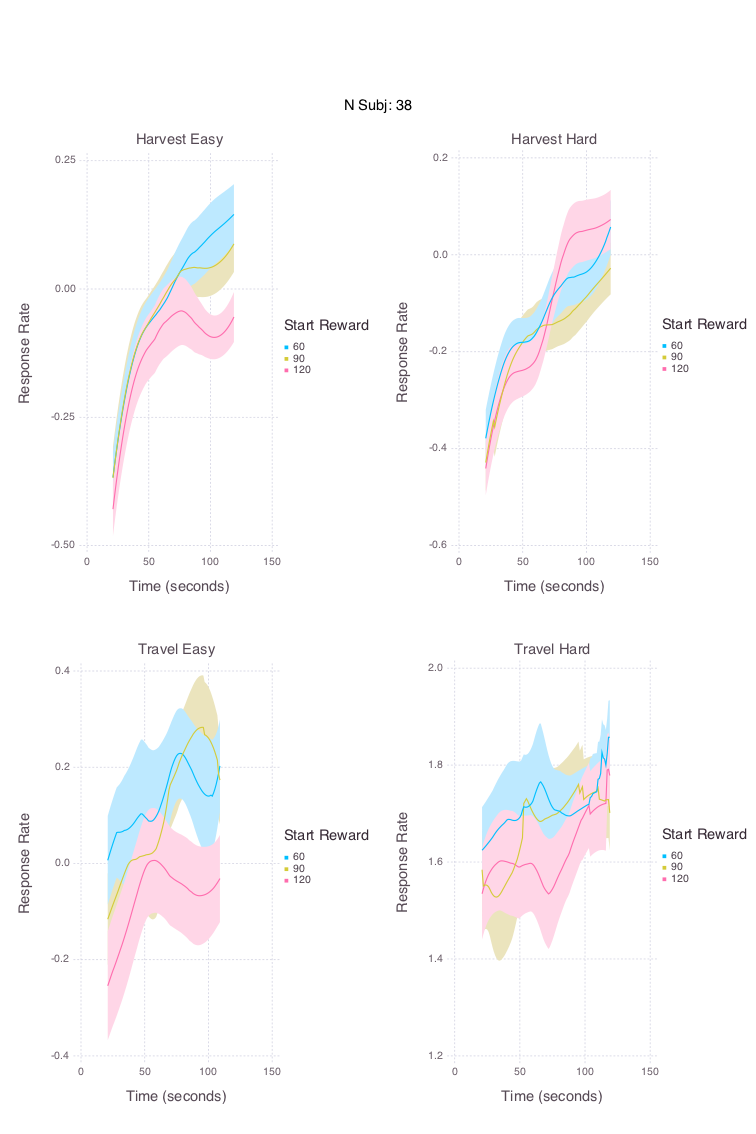

47484950

In [145]:
plot_group_rr_over_time(pdata);

7: fail some
24: fail some


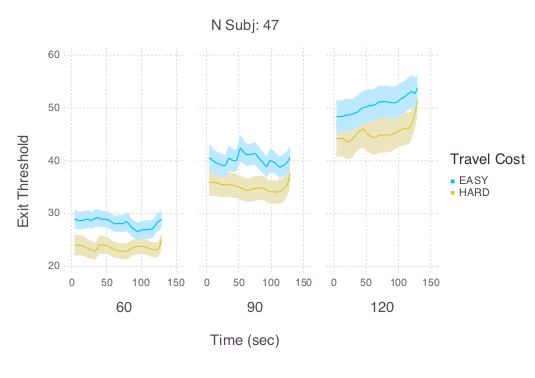

44: fail some


In [181]:
# set levels for Easy/Hard
include("sim_learn_funcs.jl")
plot_group_thresh_over_time(pdata);

In [174]:
@everywhere include("sim_lag_functions.jl")
@everywhere include("lik_funs.jl")
@everywhere include("simulation_functions.jl")

## want to now simulate the (fitted) model and plot this...
l1 = load("model_res/full_m1.jld"); m1_res = l1["m1_res"]; 

param_names_m1 = ["choice_beta", "lag_beta",
    "lr_R_hat_pre_lag", "lr_R_hat_pre_choice",
    "harvest_cost_lag", "travel_cost_easy_lag", "travel_cost_hard_lag",
    "harvest_cost_choice", "travel_cost_easy_choice", "travel_cost_hard_choice",
    "R_hat_start_lag", "R_hat_start_choice"];

# simulate a new dataset... 

function sim_data_set(x, param_names, sim_func; n_rep = 2)
    group_rec_data = DataFrame();
    NS = size(x,1);
    for rep = 1:n_rep
        for i in 1:NS
            print(i)
            these_params = x[i,:];
            p_hat_dict = Dict();
            for n in 1:length(param_names)
                p_hat_dict[param_names[n]] = these_params[n]
            end
            rec_data = sim_func(p_hat_dict)
            rec_data[!,:lower_lag_thresh] .= -Inf;
            rec_data[!,:upper_lag_thresh] .= Inf;
            rec_data[!,:subjectID] .= NS*(rep-1)+i;
            rec_data[!,:sub] .= NS*(rep-1)+i;
            group_rec_data = [group_rec_data; rec_data];
        end
    end

    group_rec_data[!,:remove] .= false;
    return group_rec_data;
end

m1_rec_data = sim_data_set(x_m1, param_names_m1, sim_forage_learn_mult; n_rep = 3);
    

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748491234567891011121314151617181920212223242526272829303132333435363738394041424344454647484912345678910111213141516171819202122232425262728293031323334353637383940414243444546474849

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748

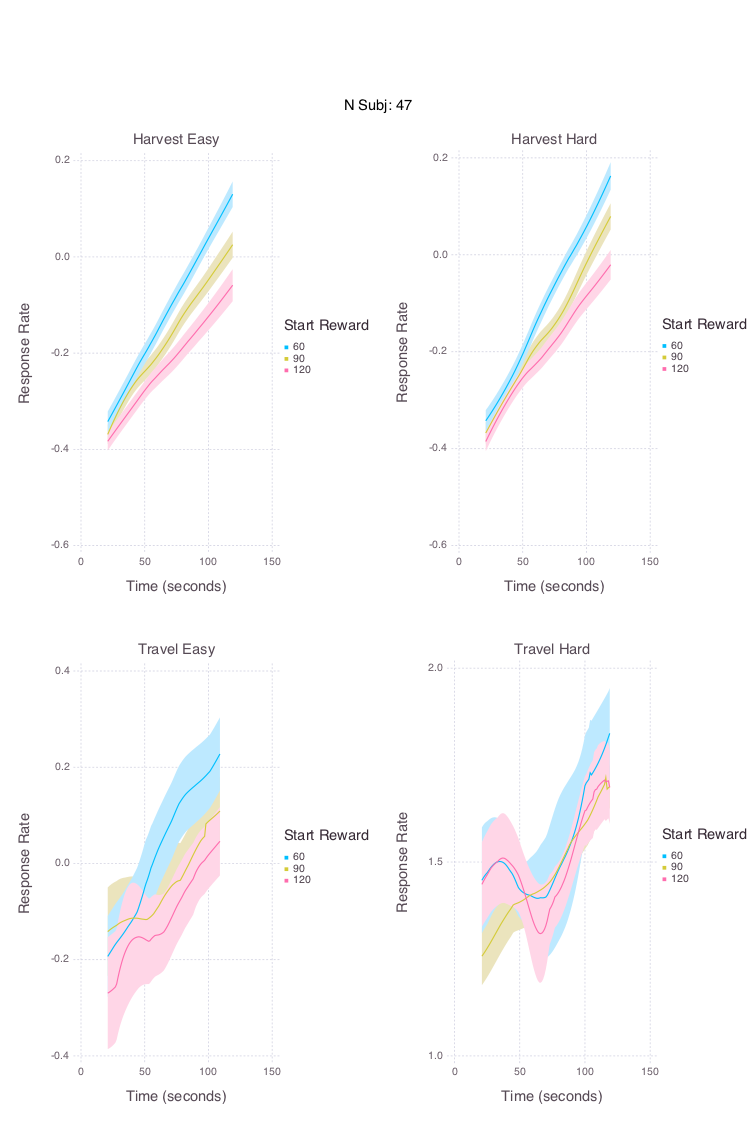

49

false

In [94]:
plot_group_rr_over_time(m1_rec_data)

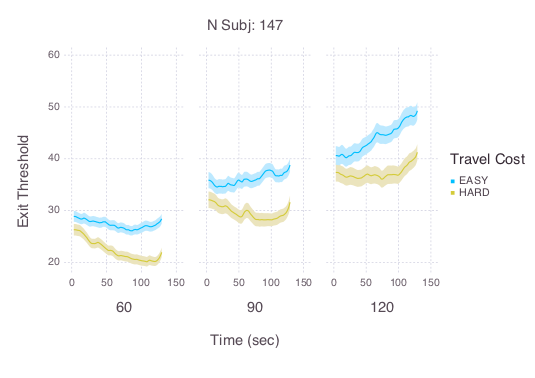

false

In [182]:
##
include("sim_learn_funcs.jl")
plot_group_thresh_over_time(m1_rec_data)

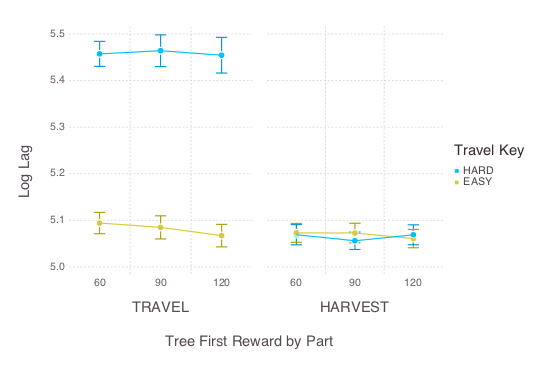

false

In [159]:
pdata_lt = @where(pdata,:lag .< :upper_lag_thresh, :lag .> :lower_lag_thresh)
p = make_group_lag_plot(pdata_lt);
draw(PNG(),p)

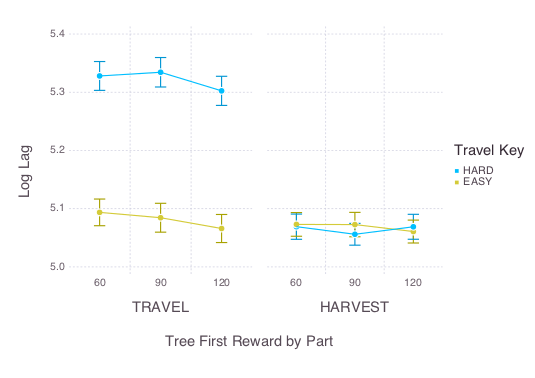

false

In [147]:
pdata_lt = @where(pdata,:lag .< :upper_lag_thresh2, :lag .> :lower_lag_thresh2)
p = make_group_lag_plot(pdata_lt);
draw(PNG(),p)

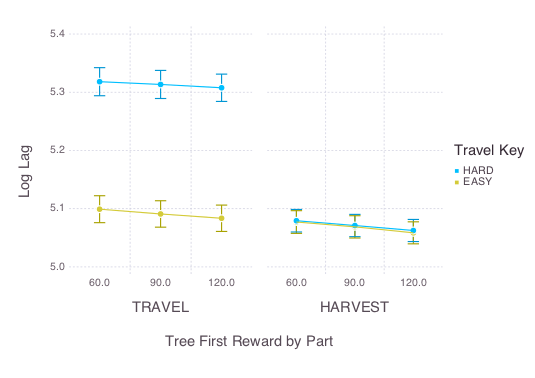

false

In [175]:
p = make_group_lag_plot(m1_rec_data);
draw(PNG(),p)

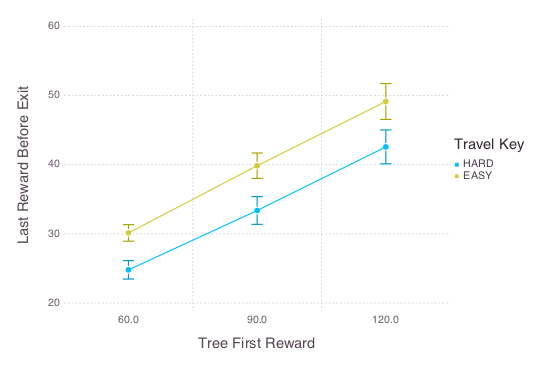

false

In [176]:
p = make_group_exit_plot(m1_rec_data, bounds = [20 60]);
draw(PNG(),p)

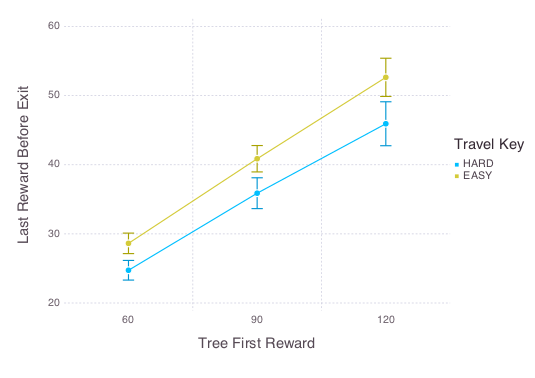

false

In [154]:
p = make_group_exit_plot(pdata, bounds = [20 60]);
draw(PNG(),p)

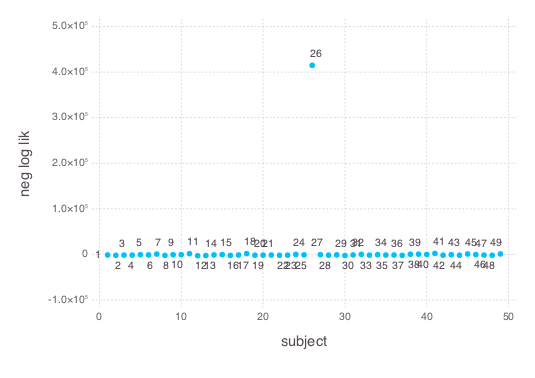

false

In [158]:
sub_idxs = 1:49
# try to simulate from the other model... possibly leave out the terrible subject.
l5 = load("model_res/full_m5.jld"); m5_res = l5["m5_res"]; # get the other model...
p = plot(x = sub_idxs, y = m5_res["l"][sub_idxs],label = string.(sub_idxs), Geom.label, Geom.point, 
    Guide.ylabel("neg log lik"), Guide.xlabel("subject"));
draw(PNG(),p)

In [163]:
include("simulation_functions.jl")
# do this w and w/out s 26...


function sim_data_set(x, param_names, sim_func; n_rep = 2)
    group_rec_data = DataFrame();
    NS = size(x,1);
    for rep = 1:n_rep
        for i in 1:NS
            print(i)
            these_params = x[i,:];
            p_hat_dict = Dict();
            for n in 1:length(param_names)
                p_hat_dict[param_names[n]] = these_params[n]
            end
            rec_data = sim_func(p_hat_dict)
            rec_data[!,:lower_lag_thresh] .= -Inf;
            rec_data[!,:upper_lag_thresh] .= Inf;
            rec_data[!,:subjectID] .= NS*(rep-1)+i;
            rec_data[!,:sub] .= NS*(rep-1)+i;
            group_rec_data = [group_rec_data; rec_data];
        end
    end

    group_rec_data[!,:remove] .= false;
    return group_rec_data;
end

param_names = ["choice_beta", "lag_beta_opp", "lag_beta",
            "lr_R_hat_pre",
            "harvest_cost", "travel_cost_easy", "travel_cost_hard",
            "R_hat_start", "harvest_bias"];
m5_rec_data = sim_data_set(m5_res["x"], param_names, sim_forage_learn_singleR_max);


1234567891011121314151617181920212223242526272829303132333435363738394041424344454647484912345678910111213141516171819202122232425262728293031323334353637383940414243444546474849

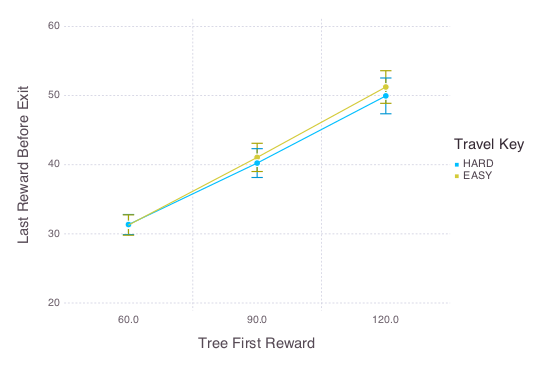

false

In [168]:
p = make_group_exit_plot(m5_rec_data, bounds = [20, 60]);
draw(PNG(), p)

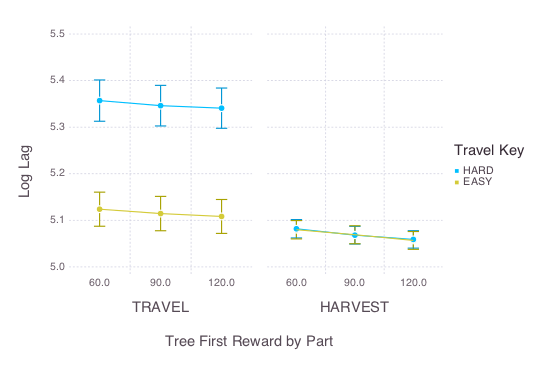

false

In [170]:
p = make_group_lag_plot(m5_rec_data);
draw(PNG(), p)

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596

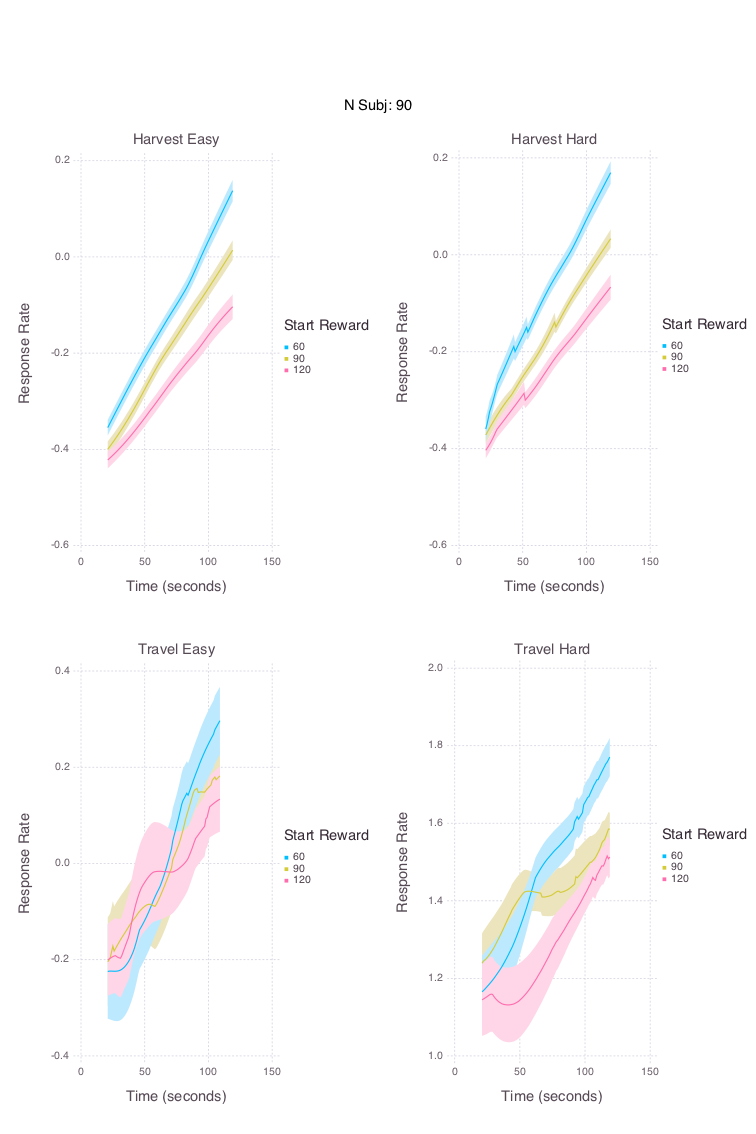

9798

false

In [172]:
m5_rec_data.lower_lag_thresh2 = m5_rec_data.lower_lag_thresh;
m5_rec_data.upper_lag_thresh2 = m5_rec_data.upper_lag_thresh;
plot_group_rr_over_time(m5_rec_data)

7: fail some


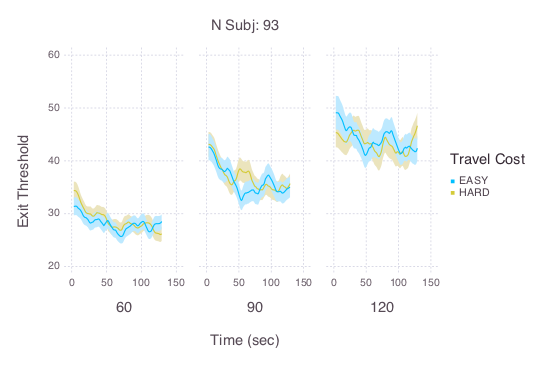

83: fail some
93: fail some


false

In [180]:
plot_group_thresh_over_time(m5_rec_data)

In [24]:
## also load the ibic for each of the models you fitted in model comparison.
l1 = load("model_res/full_m1.jld"); m1_res = l1["m1_res"]; 
l2 = load("model_res/full_m2.jld"); m2_res = l2["m2_res"]; 
l3 = load("model_res/full_m3.jld"); m3_res = l3["m3_res"]; 
l4 = load("model_res/full_m4.jld"); m4_res = l4["m4_res"]; 
l5 = load("model_res/full_m5.jld"); m5_res = l5["m5_res"]; 



In [ ]:
# compute the bic for each of these...


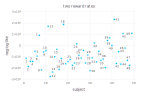

In [23]:
# shared with no harvest bias...
plot(x = 1:49,y = m1_res["l"], Guide.xlabel("subject"), label = string.(1:49), 
    Geom.label, Geom.point,
    Guide.ylabel("neg log like"),Guide.title("two reward rates"))

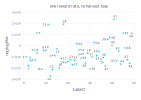

In [22]:
# shared with no harvest bias...
plot(x = 1:49,y = m2_res["l"], Guide.xlabel("subject"), label = string.(1:49), 
    Geom.label, Geom.point,
    Guide.ylabel("neg log like"),Guide.title("one reward rate, no harvest bias"))

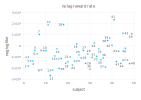

In [25]:
# no lag reward rate
plot(x = 1:49,y = m3_res["l"], Guide.xlabel("subject"), label = string.(1:49), 
    Geom.label, Geom.point,
    Guide.ylabel("neg log like"),Guide.title("no lag reward rate"))

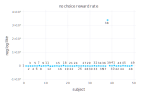

In [26]:
# shared with no harvest bias...
plot(x = 1:49,y = m4_res["l"], Guide.xlabel("subject"), label = string.(1:49), 
    Geom.label, Geom.point,
    Guide.ylabel("neg log like"),Guide.title("no choice reward rate"))

In [ ]:
# shared with no harvest bias...
plot(x = 1:49,y = m4_res["l"], Guide.xlabel("subject"), label = string.(1:49), 
    Geom.label, Geom.point,
    Guide.ylabel("neg log like"),Guide.title("no choice reward rate"))